#### Median Absolute Deviation (MAD):
you first calculate the median of the dataset, then find the absolute differences between each data point and the median.

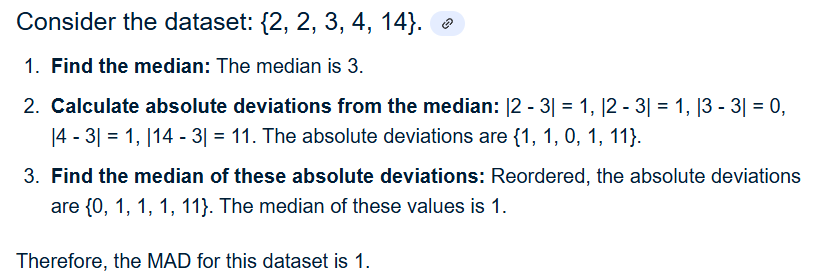

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import median_abs_deviation
import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [60]:
#To fill age column with mean data, we need to calculate mean
data['age'] = data['age'].fillna(data['age'].mean())
data['age'].head()

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [61]:
data['age'].isnull().values.any()

np.False_

In [62]:
data.isna().sum()[data.isna().sum()>0]

,0
embarked,2
deck,688
embark_town,2


In [63]:

# Select a numerical column for outlier detection
# Let's use 'age  '
age_mad = data['age']

# 1. Calculate the median of the data
median_value = np.median(age_mad)

# 2. Calculate the absolute deviations from the median
absolute_deviations = np.abs(age_mad - median_value)

# 3. Calculate the Median Absolute Deviation (MAD)
mad_value = np.median(absolute_deviations)

# A more robust MAD using scipy's function (scaled for normal distribution consistency)
# mad_value_robust = median_abs_deviation(age_mad, scale='normal')

# 4. Define a threshold for outlier detection (e.g., 3 standard deviations equivalent)
# A common multiplier for MAD-based outlier detection is 3 or 3.5.
# For consistency with standard deviation, a factor of 1.4826 (for normally distributed data)
# is often used to scale MAD to be comparable to standard deviation.
# So, threshold_factor * MAD_scaled.
# Let's use a simple multiplier of 3 for demonstration.
threshold_multiplier = 3

# Calculate the outlier bounds
lower_bound = median_value - (threshold_multiplier * mad_value)
upper_bound = median_value + (threshold_multiplier * mad_value)

# 5. Identify outliers
outliers = age_mad[(age_mad < lower_bound) | (age_mad > upper_bound)]

print(f"Column: {age_mad}")
print(f"Median: {median_value:.2f}")
print(f"MAD: {mad_value:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print("\nIdentified Outliers:")

# Handling outliers (example: removing them)
age_no_outliers = age_mad[(age_mad >= lower_bound) & (age_mad <= upper_bound)]
print(f"\nOriginal DataFrame shape: {age_mad.shape}")
print(f"DataFrame shape after removing outliers: {age_no_outliers.shape}")

Column: 0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64
Median: 29.70
MAD: 6.30
Lower Bound: 10.80
Upper Bound: 48.60

Identified Outliers:

Original DataFrame shape: (891,)
DataFrame shape after removing outliers: (747,)


In [64]:
outliers

,age
6,54.0
7,2.0
10,4.0
11,58.0
15,55.0
...,...
851,74.0
852,9.0
857,51.0
869,4.0


In [65]:
age_mad.head()

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


<Axes: ylabel='age'>

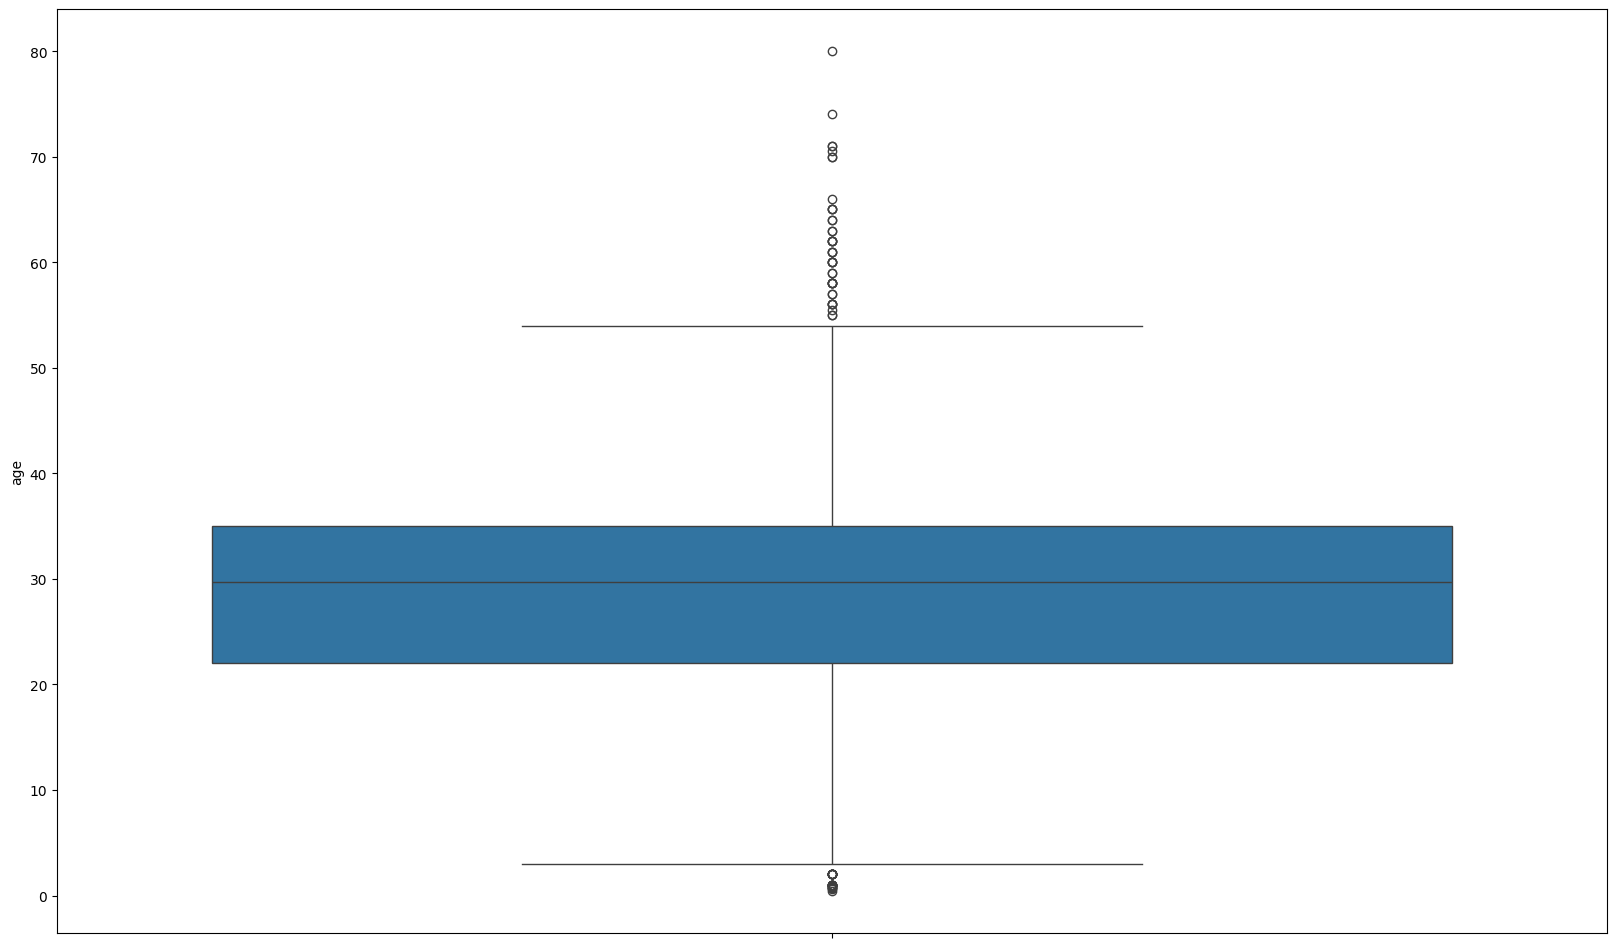

In [66]:
plt.figure(figsize=(20,12))
sns.boxplot(y="age", data=data)